In [3]:
! pip install segmentation_models
! pip install albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 30.1 MB/s eta 0:00:0000:0100:01


In [1]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

# Model stuff
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D
from keras.models import Model
from keras.utils import normalize
import segmentation_models as sm
from sklearn.model_selection import train_test_split

import model_utility_rpjb
import preprocess_filter
import spoketools

#path sorting
import glob
from pathlib import Path
import re

#math
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

Segmentation Models: using `tf.keras` framework.


In [4]:
model_path = "models/rpjb_models/"
type = "all_aug_shift_fixed_norm"
training_size = "1020"
epoch_num = "300"
backbone = "resnet34"

model_path = f"{model_path}{type}_spoke_{training_size}im_{epoch_num}e_{backbone}.h5"

In [3]:
X, Y = [], []

X, Y = model_utility_rpjb.data_gather(X, Y, "spokes_all_rpjbs", "spokes_all_masks", aug_num=5)

Compose([
  ShiftScaleRotate(always_apply=False, p=0.5, shift_limit_x=(-0.0625, 0.0625), shift_limit_y=(0, 0), scale_limit=(0.0, 0.0), rotate_limit=(0, 0), interpolation=1, border_mode=4, value=None, mask_value=None, rotate_method='largest_box'),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={}, is_check_shapes=True)
1020 1020


In [4]:
X = normalize(np.array(X))
Y = np.array(Y)

# train/test split test_size = .15 for light, .25 for dark(no agu)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)

SIZE_Y, SIZE_X = X.shape[1], X.shape[2]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(867, 160, 736)
(153, 160, 736)
(867, 160, 736)
(153, 160, 736)


In [5]:
model = model_utility_rpjb.define_model(SIZE_Y, SIZE_X, backbone)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, 160, 736, 1  0           []                               
                                )]                                                                
                                                                                                  
 bn_data (BatchNormalization)   (None, 160, 736, 1)  3           ['data[0][0]']                   
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 166, 742, 1)  0          ['bn_data[0][0]']                
                                                                                                  
 conv0 (Conv2D)                 (None, 80, 368, 64)  3136        ['zero_padding2d[0][0]']   

In [6]:
history = model_utility_rpjb.fit_model(x_train, y_train, model, model_path, batch_size = 10, epochs = int(epoch_num), validation_split = .13)
results = model.evaluate(x_test, y_test)
model_utility_rpjb.save_model_history(model_path, model, history, results)

Epoch 1/300
76/76 [==============================] - ETA: 0s - loss: 0.3569 - iou_score: 0.0408
Epoch 1: val_iou_score improved from -inf to 0.02759, saving model to models/rpjb_models/all_aug_shift_fixed_norm_spoke_170im_300e_resnet34.h5
76/76 [==============================] - 30s 260ms/step - loss: 0.3569 - iou_score: 0.0408 - val_loss: 10.0701 - val_iou_score: 0.0276
Epoch 2/300
76/76 [==============================] - ETA: 0s - loss: 0.0882 - iou_score: 0.1312
Epoch 2: val_iou_score improved from 0.02759 to 0.02793, saving model to models/rpjb_models/all_aug_shift_fixed_norm_spoke_170im_300e_resnet34.h5
76/76 [==============================] - 16s 205ms/step - loss: 0.0882 - iou_score: 0.1312 - val_loss: 0.6275 - val_iou_score: 0.0279
Epoch 3/300
76/76 [==============================] - ETA: 0s - loss: 0.0607 - iou_score: 0.2243
Epoch 3: val_iou_score improved from 0.02793 to 0.02909, saving model to models/rpjb_models/all_aug_shift_fixed_norm_spoke_170im_300e_resnet34.h5
76/76 [=

Which model is this? - all_aug_shift_fixed_norm_spoke_170im_300e_resnet34.json


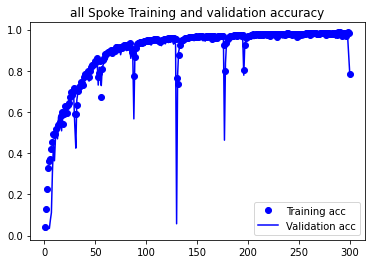

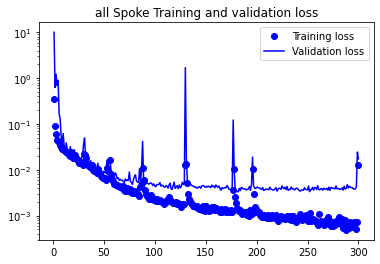

Last Train IOU Score:  0.7855203747749329
Last Train Loss Score:  0.01265459693968296
Last Validation IOU Score:  0.7943942546844482
Last Validation Loss Score:  0.01728864759206772
all_aug_shift_fixed_norm
170
300


In [7]:
model_utility_rpjb.display_results(model_path)
print(type)
print(training_size)
print(epoch_num)

all_aug_shift_fixed_norm
1020
300
The spokes_test_rpjbs/ training set is made of 15 images
W1593676089_1_CALIB.rpjb 0
(160, 736)


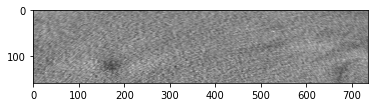

1/1 [==============================] - 7s 7s/step


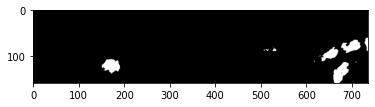

W1593678128_1_CALIB.rpjb 1
(160, 736)


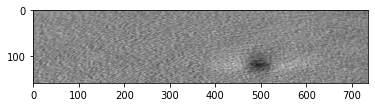

1/1 [==============================] - 0s 27ms/step


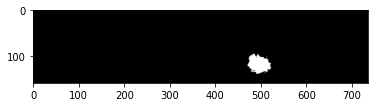

W1593680167_1_CALIB.rpjb 2
(160, 736)


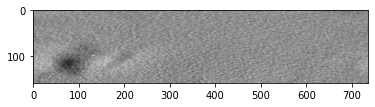

1/1 [==============================] - 0s 34ms/step


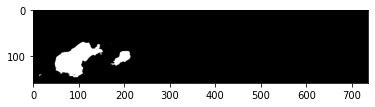

W1593682206_1_CALIB.rpjb 3
(160, 736)


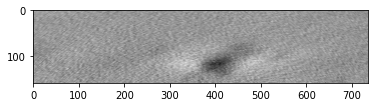

1/1 [==============================] - 0s 30ms/step


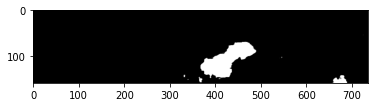

W1593684245_1_CALIB.rpjb 4
(160, 736)


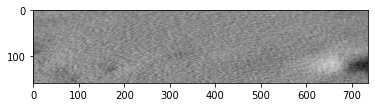

1/1 [==============================] - 0s 26ms/step


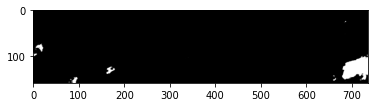

W1593686284_1_CALIB.rpjb 5
(160, 736)


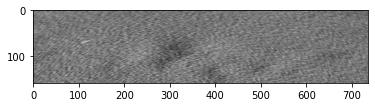

1/1 [==============================] - 0s 27ms/step


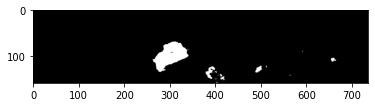

W1593688323_1_CALIB.rpjb 6
(160, 736)


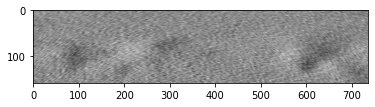

1/1 [==============================] - 0s 27ms/step


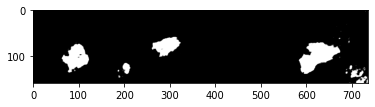

W1593690362_1_CALIB.rpjb 7
(160, 736)


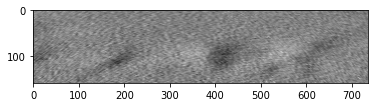

1/1 [==============================] - 0s 35ms/step


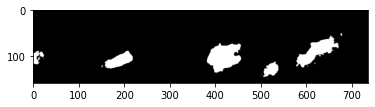

W1593692401_1_CALIB.rpjb 8
(160, 736)


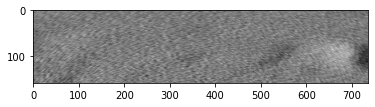

1/1 [==============================] - 0s 28ms/step


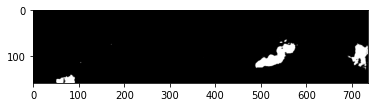

W1593696479_1_CALIB.rpjb 9
(160, 736)


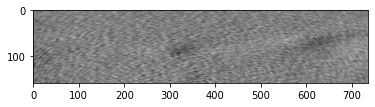

1/1 [==============================] - 0s 27ms/step


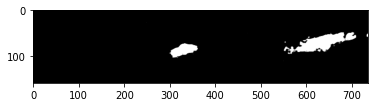

W1593698518_1_CALIB.rpjb 10
(160, 736)


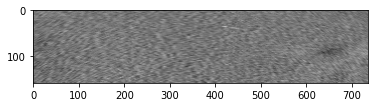

1/1 [==============================] - 0s 29ms/step


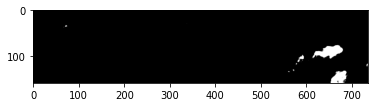

W1593700557_1_CALIB.rpjb 11
(160, 736)


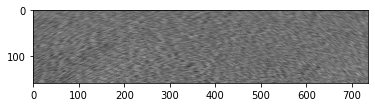

1/1 [==============================] - 0s 28ms/step


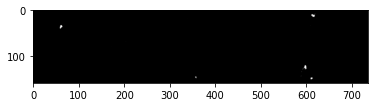

W1593702596_1_CALIB.rpjb 12
(160, 736)


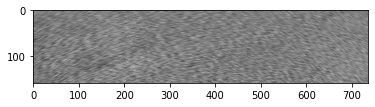

1/1 [==============================] - 0s 30ms/step


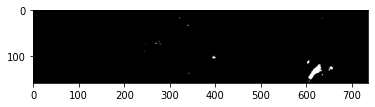

W1593704635_1_CALIB.rpjb 13
(160, 736)


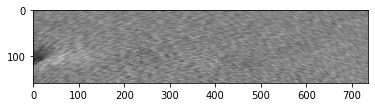

1/1 [==============================] - 0s 29ms/step


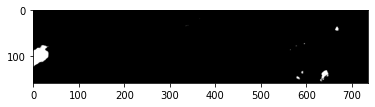

W1593706674_1_CALIB.rpjb 14
(160, 736)


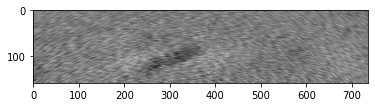

1/1 [==============================] - 0s 27ms/step


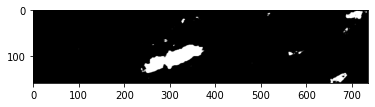

In [5]:
model = keras.models.load_model(model_path, compile = False)
model.compile(optimizer = "Adam" , loss = "binary_crossentropy", metrics = [sm.metrics.IOUScore()], )

print(type)
print(training_size)
print(epoch_num)

model_utility_rpjb.model_testing(model, "spokes_test_rpjbs", 15)